# Import Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys, os, scipy, sklearn
import sklearn.metrics, sklearn.preprocessing, sklearn.model_selection, sklearn.tree, sklearn.linear_model, sklearn.cluster

In [4]:
mpl.rcParams['font.size'] = 14
pd.options.display.max_columns = 1000

# Load Data

In [5]:
data_folder = './'
data_files = os.listdir(data_folder)
display('Course files:',
        data_files)
for file_name in data_files:
    if '.csv' in file_name:
        globals()[file_name.replace('.csv','')] = pd.read_csv(data_folder+file_name, 
                                                              ).reset_index(drop=True)
        print(file_name)
        display(globals()[file_name.replace('.csv','')].head(), globals()[file_name.replace('.csv','')].shape)

'Course files:'

['wbc.csv',
 '.DS_Store',
 'Chapter_01_Classification_and_Regression_Trees.ipynb',
 'bikes.csv',
 'indian_liver_patient.csv',
 'indian_liver_patient_preprocessed.csv',
 'Chapter_02_The_Bias-Variance_Tradeoff.ipynb',
 '.ipynb_checkpoints',
 'auto.csv']

wbc.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


(569, 33)

bikes.csv


,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


(1488, 13)

indian_liver_patient.csv


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


(583, 11)

indian_liver_patient_preprocessed.csv


,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


(579, 12)

auto.csv


,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


(392, 7)

In [6]:
df = auto

In [7]:
X = df[['displ', 'hp', 'weight', 'accel', 'size', 'origin']]
y = df['mpg']

In [8]:
OneHotEncoder = sklearn.preprocessing.OneHotEncoder()
OneHotEncodings = OneHotEncoder.fit_transform(df[['origin']]).toarray()
OneHotEncodings = pd.DataFrame(OneHotEncodings,
                               columns = ['origin_'+header for header in OneHotEncoder.categories_[0]])

X = X.drop(columns = 'origin').reset_index(drop=True)
X = pd.concat((X,OneHotEncodings),axis=1)

In [9]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
print(X_train.shape,y_train.shape)

(294, 8) (294,)


# Instantiate the model

In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

We have already processed the data and loaded the features matrix X and the array y in your workspace. In addition, the DecisionTreeRegressor class was imported from sklearn.tree.

In [11]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(min_samples_leaf=0.26, max_depth=4, random_state=SEED)

# Evaluate the 10-fold CV error

In this exercise, you'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree dt that you instantiated in the previous exercise.

In addition to dt, the training data including X_train and y_train are available in your workspace. We also imported cross_val_score from sklearn.model_selection.

Note that since cross_val_score has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs.

In [13]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10,  n_jobs=-1)

# Compute the 10-folds CV RMSE
import numpy as np
RMSE_CV = np.sqrt(MSE_CV_scores.mean())

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


# Evaluate the training error

You'll now evaluate the training set RMSE achieved by the regression tree dt that you instantiated in a previous exercise.

In addition to dt, X_train and y_train are available in your workspace.

In [14]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(0.5)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


# Define the ensemble

In the following set of exercises, you'll work with the Indian Liver Patient Dataset from the UCI Machine learning repository.

In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

The classes LogisticRegression, DecisionTreeClassifier, and KNeighborsClassifier under the alias KNN are available in your workspace.

In [31]:
df = indian_liver_patient_preprocessed
df.head()

X = df.drop(columns = ['Liver_disease'])
y = df['Liver_disease']

X_train, X_test,  y_train, y_test = sklearn.model_selection.train_test_split(X,y)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

# Evaluate individual classifiers

In this exercise you'll evaluate the performance of the models in the list classifiers that we defined in the previous exercise. You'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

The dataset is already loaded and preprocessed for you (numerical features are standardized) and it is split into 70% train and 30% test. The features matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have loaded the list classifiers from the previous exercise, as well as the function accuracy_score() from sklearn.metrics.

In [34]:
from sklearn.metrics import accuracy_score

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.717
K Nearest Neighbours : 0.697
Classification Tree : 0.724


/Users/johnleonard/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Better performance with a Voting Classifier

Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

X_train, X_test,y_train, y_test, the list classifiers defined in a previous exercise, as well as the function accuracy_score from sklearn.metrics are available in your workspace.

In [35]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train,y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.745


/Users/johnleonard/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Define the bagging classifier

In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

In [36]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

# Evaluate Bagging performance

Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [37]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.72


# Prepare the ground

In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In your environment, we have made available the class DecisionTreeClassifier from sklearn.tree.

In [38]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

# OOB Score vs Test Set Score

Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the classifier bc instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [ ]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

# Train an RF regressor

In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [40]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

# Evaluate the RF regressor

You'll now evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_test, as well as the array y_test are available in your workspace. In addition, we have also loaded the model rf that you trained in the previous exercise.

In [41]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**0.5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.40


# Visualizing features importances

In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

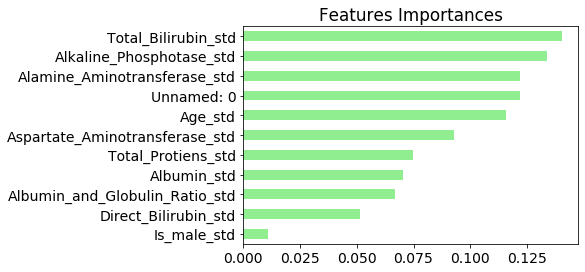

In [43]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()